<a href="https://colab.research.google.com/github/yaya0001/my_project/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv("/content/Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
enc=OrdinalEncoder()
data["mainroad"]=enc.fit_transform(data[["mainroad"]])
data['mainroad']

,mainroad
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
540,1.0
541,0.0
542,1.0
543,0.0


In [ ]:
col=["guestroom",'basement','hotwaterheating','airconditioning','prefarea']

In [ ]:
ord=OrdinalEncoder(categories=[['unfurnished','furnished','semi-furnished']])
data['furnishingstatus']=ord.fit_transform(data[['furnishingstatus']])
data['price']=np.log(data['price'])

In [ ]:
data[col]=enc.fit_transform(data[col])
data.head(100)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,1.0
1,16.321036,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,1.0
2,16.321036,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,2.0
3,16.318175,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,1.0
4,16.250001,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15.656060,4100,3,2,3,1.0,0.0,0.0,0.0,1.0,2,0.0,2.0
96,15.656060,9000,3,1,1,1.0,0.0,1.0,0.0,0.0,1,1.0,1.0
97,15.656060,6400,3,1,1,1.0,1.0,1.0,0.0,1.0,1,1.0,2.0
98,15.654948,6600,3,2,3,1.0,0.0,0.0,0.0,1.0,0,1.0,0.0


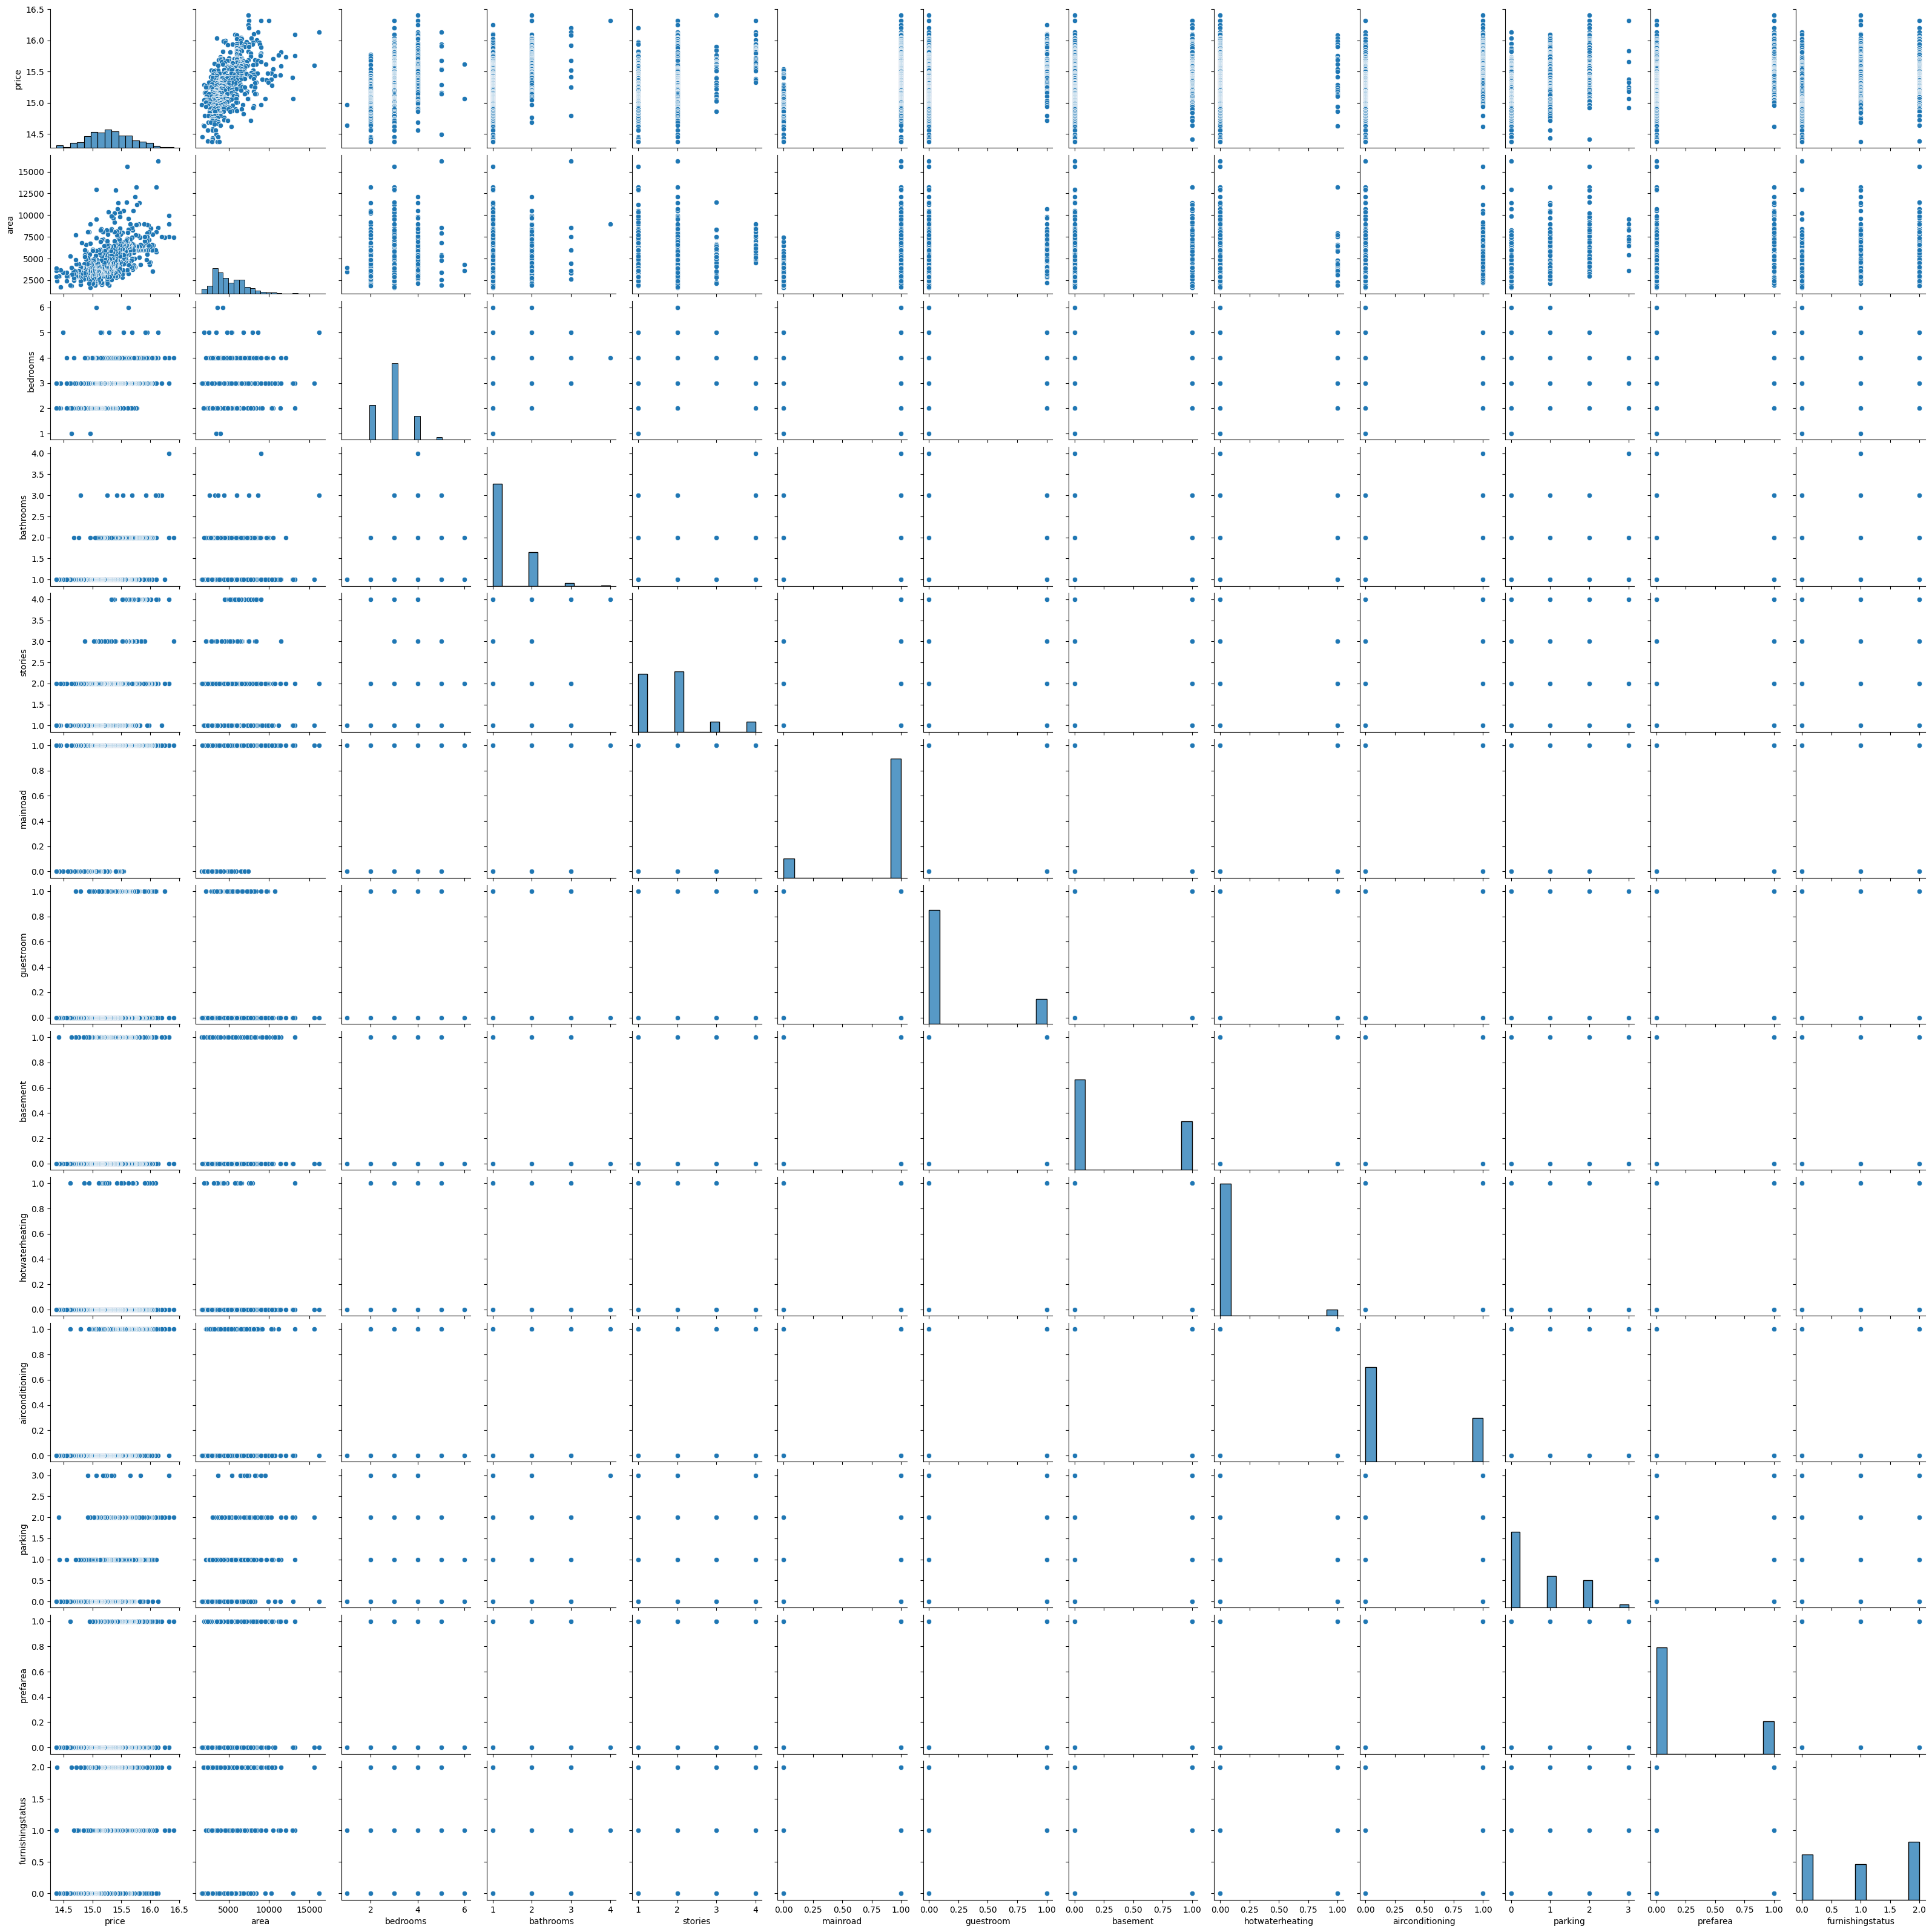

In [ ]:
sns.pairplot(data)

<Axes: xlabel='price', ylabel='Count'>

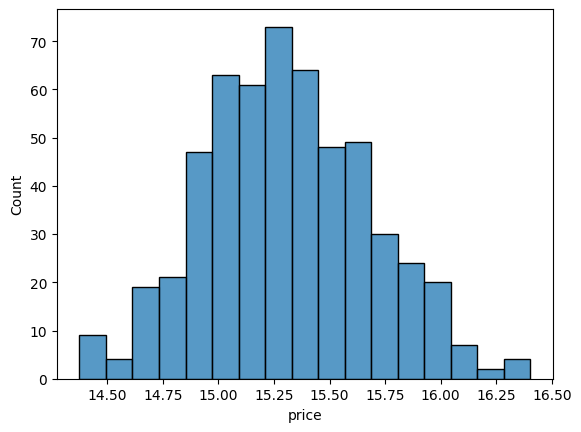

In [ ]:
sns.histplot(data['price'])

<Axes: >

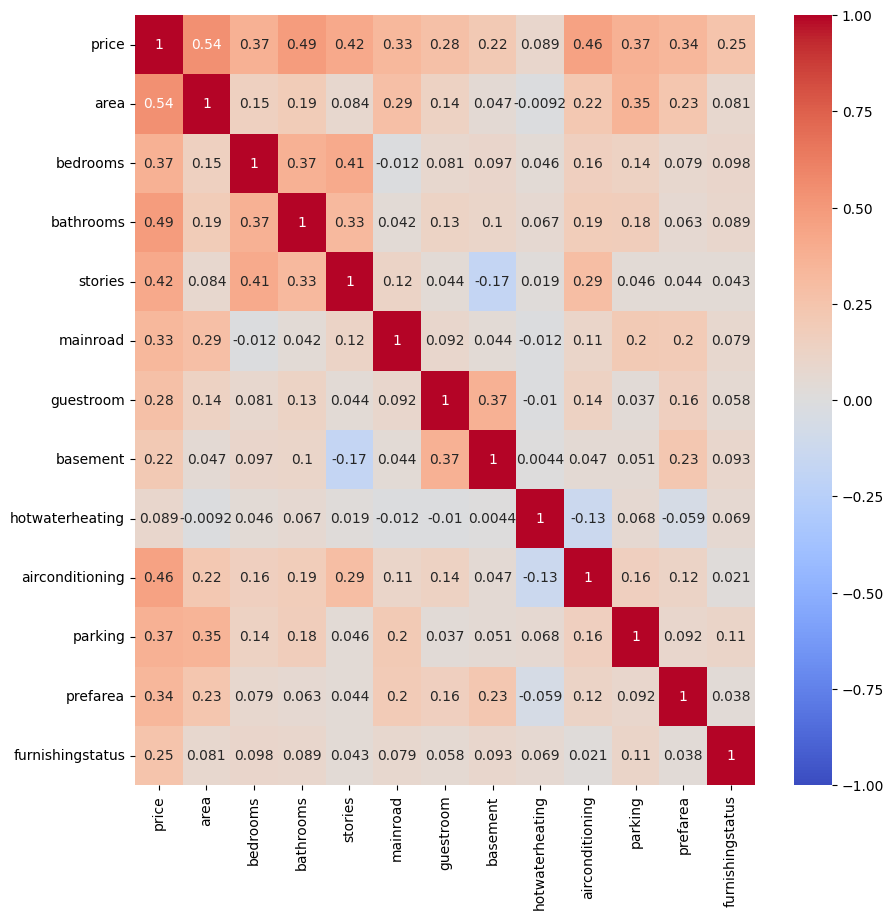

In [ ]:
c=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(c,vmin=-1,vmax=1,annot=True, cmap="coolwarm")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
x=data.drop('price', axis=1)
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
cols=['price','area','bedrooms','bathrooms','stories','parking']
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_per=model.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_per)
r=r2_score(y_test,y_per)
r

0.6722653395195268